### Objective

The objective of this project is to analyze and predict customer churn for Uber using key user behavior and demographic data. The dataset contains various features such as trip frequency, average distance traveled, ratings (both given and received), surge pricing experiences, and device usage. By exploring these variables, the goal is to build a predictive model that identifies users at risk of churn. Understanding these patterns will allow Uber to develop targeted strategies to improve user retention, reduce churn rates, and optimize service offerings across different cities and user segments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('churnnotclean.csv.zip')
df.head()

,Unnamed: 0,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


Here’s an explanation of the features in your dataset:

1. **avg_dist**: The average distance (in miles or kilometers) the user traveled per trip. 
   - Example: 3.67 means the user traveled an average of 3.67 units per trip.

2. **avg_rating_by_driver**: The average rating (out of 5) the user received from drivers.
   - Example: A value of 5.0 means the user received perfect ratings from drivers.

3. **avg_rating_of_driver**: The average rating (out of 5) the user gave to drivers.
   - Example: 4.7 means the user rated drivers an average of 4.7.

4. **avg_surge**: The average surge multiplier the user experienced during their trips.
   - Example: 1.10 indicates that the user typically paid 1.1 times the normal fare due to surge pricing.

5. **city**: The city the user took trips in (e.g., "King’s Landing", "Astapor", "Winterfell").
   - Example: "King’s Landing" is the city where the user mainly traveled.

6. **last_trip_date**: The date the user last took a trip.
   - Example: "2014-06-17" means the user’s last trip was on June 17, 2014.

7. **phone**: The type of phone the user has (e.g., "iPhone", "Android").
   - Example: "iPhone" indicates the user has an iPhone.

8. **signup_date**: The date the user signed up for the Uber service.
   - Example: "2014-01-25" means the user signed up on January 25, 2014.

9. **surge_pct**: The percentage of trips taken with surge pricing.
   - Example: 15.4% means the user took 15.4% of their trips during surge pricing periods.

10. **trips_in_first_30_days**: The number of trips the user took in the first 30 days after signing up.
    - Example: 4 means the user took 4 trips in their first 30 days.

11. **luxury_car_user**: A boolean (True/False) indicating whether the user has taken trips in luxury cars.
    - Example: "True" means the user has used luxury cars.

12. **weekday_pct**: The percentage of trips taken on weekdays.
    - Example: 46.2% means the user took 46.2% of their trips on weekdays.

13. **churn**: A binary variable (0 or 1) indicating whether the user has churned (stopped using the service). 
    - Example: "0" means the user has not churned, "1" means the user has churned.

In [5]:
df.shape     # 50000 samples and 13 features in a dataset.

(50000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                50000 non-null  float64
 1   avg_rating_by_driver    49799 non-null  float64
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   city                    50000 non-null  object 
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   signup_date             50000 non-null  object 
 8   surge_pct               50000 non-null  float64
 9   trips_in_first_30_days  50000 non-null  int64  
 10  luxury_car_user         50000 non-null  bool   
 11  weekday_pct             50000 non-null  float64
 12  churn                   50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [7]:
df.isnull().sum()   # Null values are present in some dataset.

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
churn                        0
dtype: int64

In [8]:
df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.0,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0


# features .

- **numerical**  = avg_dist , avg_rating_by_driver ,avg_rating_of_driver, avg_surge ,surge_pct, trips_in_first_30_days , weekday_pct
  
- **categorical** = city , phone , luxury_car_users , churn.
  
- **Date** = last_trip_date , signup_date , 

# Univarite analysis.

In [9]:
def graphs(data):
  """Plots a histogram and boxplot of the data side-by-side."""

  # Create a subplot grid
  fig, axes = plt.subplots(1, 2, figsize=(5, 3))

  # Plot the histogram
  sns.histplot(data, kde=True, ax=axes[0])
  axes[0].set_title("Histogram")

  # Plot the boxplot
  sns.boxplot(data, ax=axes[1])
  axes[1].set_title("Boxplot")

  # Adjust layout
  plt.tight_layout()
  plt.show()


In [10]:
def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    
    # Detecting outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    
    return outliers


# 1.avg_dist.

- **Insights**

- average distance travel by user are 5.79 unit(Kilometer or mile).
- Histogram shows a data was highlly right skeweed it means the most of the users are book our cab for short distances.
- Box plot shows major outliers it means there are some users they travell in our cabs for a long distances.

- **Preprocessing**
- We can apply transformation in avg_dist feature.

In [11]:
df['avg_dist'].describe()      # average distance travel by user are 5.79 unit(Kilometer or mile)

count    50000.000000
mean         5.796827
std          5.707357
min          0.000000
25%          2.420000
50%          3.880000
75%          6.940000
max        160.960000
Name: avg_dist, dtype: float64

In [12]:
df['avg_dist'].isnull().sum()   # No null value are present in avg_dist features.

0

In [13]:
df['avg_dist'].skew()

3.4641702935544214

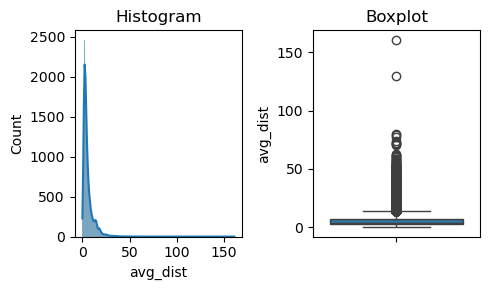

In [14]:
graphs(df['avg_dist'])

- Histogram shows a data was highlly right skeweed it means the most of the users are book our cab for short distances.
- Box plot shows major outliers it means there are some users they travell in our cabs for a long distances.
                                                                                            

In [15]:
detect_outliers(df,'avg_dist')    # we can not remove these outliers.

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
12,20.29,5.0,NaN,1.0,Winterfell,2014-12-03,iPhone,2014-01-15,0.0,1,False,100.0,0
14,26.01,5.0,NaN,1.0,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0,1
25,14.48,5.0,NaN,1.0,Winterfell,2014-03-01,iPhone,2014-02-01,0.0,1,True,100.0,1
35,14.16,5.0,5.0,1.0,King's Landing,2014-02-21,Android,2014-01-17,0.0,2,False,100.0,1
39,13.73,5.0,NaN,1.0,King's Landing,2014-06-23,iPhone,2014-09-01,0.0,1,True,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49947,13.74,5.0,NaN,1.0,Winterfell,2014-01-28,iPhone,2014-12-01,0.0,1,True,100.0,1
49961,14.09,5.0,4.7,1.0,King's Landing,2014-12-02,iPhone,2014-01-25,0.0,4,False,100.0,0
49980,14.42,5.0,NaN,1.0,Astapor,2014-01-20,Android,2014-05-01,0.0,1,False,100.0,1
49982,15.23,5.0,5.0,1.0,King's Landing,2014-04-24,iPhone,2014-01-21,0.0,0,False,100.0,1


# 2.avg_rating_by_driver.

- **Insights**
- Average rating by driver to user was 4.77.
- Histogram shows most of the drivers give between 4 to  5  rating .
- boxplot shows outliers .


- **Preprocessing**
- we cannot remove outliers and also  we can not  transformation.


In [16]:
df['avg_rating_by_driver'].describe()   # Average rating by driver to user was 4.77.

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [17]:
df['avg_rating_by_driver'].isnull().sum()  # null values are present we can decided to fill these null values

201

In [18]:
df['avg_rating_by_driver'].skew()    # shows highhly negatively left skweed data .

-4.128909161682118

In [19]:
# this feature is highhly negatively left skweed data so we can decided to fill null values with median.
median_value = df['avg_rating_by_driver'].median()
median_value

5.0

In [20]:
df['avg_rating_by_driver'].fillna(median_value,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\907280014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_rating_by_driver'].fillna(median_value,inplace=True)


In [21]:
df['avg_rating_by_driver'].isnull().sum()   # Now null value are replaced with median value.

0

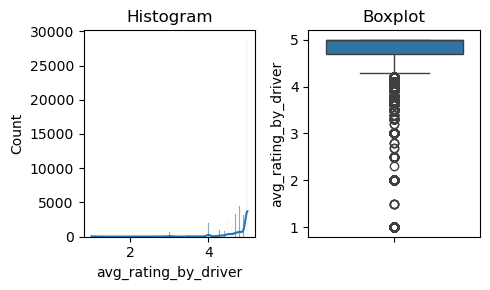

In [22]:
graphs(df['avg_rating_by_driver'])

- Histogram shows most of the drivers give between 4 to  5  rating .
- boxplot shows outliers .

In [23]:
detect_outliers(df,'avg_rating_by_driver') # we can not remove outliers.

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
6,3.95,4.0,NaN,1.0,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1
16,10.86,3.0,5.0,1.0,King's Landing,2014-06-28,Android,2014-11-01,0.0,1,True,50.0,0
20,2.53,3.0,NaN,1.0,Winterfell,2014-03-16,Android,2014-01-31,0.0,1,False,50.0,1
45,3.00,4.2,4.0,1.0,Astapor,2014-04-19,Android,2014-10-01,0.0,3,False,50.0,1
72,0.00,3.0,5.0,1.0,Astapor,2014-08-01,iPhone,2014-07-01,0.0,1,False,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49976,2.39,4.0,2.0,1.0,King's Landing,2014-01-07,iPhone,2014-01-21,0.0,0,False,100.0,1
49987,4.24,4.0,4.6,1.0,Winterfell,2014-05-31,iPhone,2014-01-27,0.0,3,False,80.0,1
49995,5.63,4.2,5.0,1.0,King's Landing,2014-05-06,iPhone,2014-01-25,0.0,0,False,100.0,1
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0,1


# 3.avg_rating_of_driver

- **Insights**
-  Average rating of driver was 4.60.
-  - Histogram shows highlly left skeweness it means most of the users give a 4 to 5 rating to the drivers.
- Box plot shows outliers but we can not remove these outliers.

- **Preprocessing**
- we can no remove outliers .
- However we can apply transformation .

In [24]:
df['avg_rating_of_driver'].describe()   # Average rating of driver was 4.60

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [25]:
df['avg_rating_of_driver'].isnull().sum()    # there are null value are present.

8122

In [26]:
df['avg_rating_of_driver'].skew()

-2.4284849281100045

In [27]:
# we can decided to fill null value with median value.
median_value = df['avg_rating_of_driver'].median()
df['avg_rating_of_driver'].fillna(median_value,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\323479669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_rating_of_driver'].fillna(median_value,inplace=True)


In [28]:
df['avg_rating_of_driver'].isnull().sum()  # Now null values are removed.

0

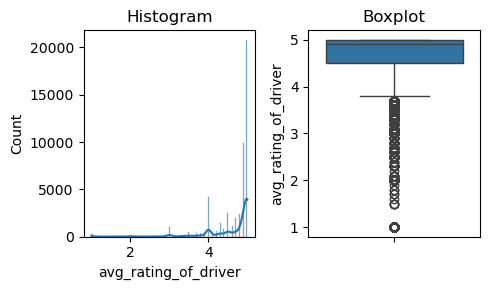

In [29]:
graphs(df['avg_rating_of_driver'])

- Histogram shows highlly left skeweness it means most of the users give a 4 to 5 rating to the drivers.
- Box plot shows outliers but we can not remove these outliers.

# 4.avg_surge.

- **Insights**
- average of avg_surge rate was 1.07.
- - Histogram shows highlly right skeweed data it means most of the avg_surge rate is around 1 to 1.05.
- Boxplot shows outliers it means some user paid higher avg_surge rate.

- **Preprocessing**
-  we can not remove outliers because more than 90% data was considered as outliers.
-  However we can apply a transformation in a feature.

In [30]:
df['avg_surge'].describe()  # average of avg_surge rate was 1.07.

count    50000.000000
mean         1.074764
std          0.222336
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

In [31]:
df['avg_surge'].isnull().sum()   # No null values are present.

0

In [32]:
df['avg_surge'].skew()   

6.82134619068908

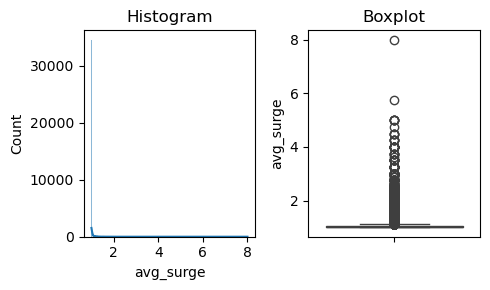

In [33]:
graphs(df['avg_surge'])

- Histogram shows highlly right skeweed data it means most of the avg_surge rate is around 1 to 1.05.
- Boxplot shows outliers it means some user paid higher avg_surge rate.

In [34]:
detect_outliers(df,'avg_surge')  # we can not remove outliers because more than 90% data was considered as outliers.

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1
13,3.04,5.0,4.0,1.38,King's Landing,2014-08-06,iPhone,2014-01-29,50.0,0,False,50.0,0
18,6.83,4.8,4.6,1.21,King's Landing,2014-06-24,iPhone,2014-01-28,30.8,6,True,80.8,0
19,12.08,5.0,5.0,1.17,King's Landing,2014-03-06,iPhone,2014-02-01,33.3,0,False,66.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49969,3.75,5.0,4.3,1.33,Astapor,2014-05-04,iPhone,2014-01-29,50.0,2,True,50.0,1
49972,4.60,3.5,4.0,1.25,Winterfell,2014-06-29,iPhone,2014-12-01,50.0,1,False,0.0,0
49974,4.63,5.0,5.0,2.00,Winterfell,2014-01-18,iPhone,2014-05-01,100.0,1,False,100.0,1
49991,1.06,5.0,5.0,1.25,Winterfell,2014-06-29,iPhone,2014-08-01,100.0,0,False,0.0,0


# 5 . surge_pct.

- **Insights**
-  average of surge_pct is 8.84% it means a one user in Uber takes almost 9% ride with extra fare.
  

- **Preprocessing**
- we can not  remove outliers
-  we can transform this feature.

In [35]:
df['surge_pct'].describe()   # average of surge_pct is 8.84% it means a one user in Uber takes almost 9% ride with extra fare.

count    50000.000000
mean         8.849536
std         19.958811
min          0.000000
25%          0.000000
50%          0.000000
75%          8.600000
max        100.000000
Name: surge_pct, dtype: float64

In [36]:
df['surge_pct'].skew()

3.144123929858724

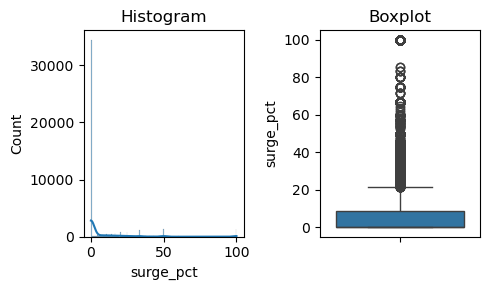

In [37]:
graphs(df['surge_pct'])

In [38]:
detect_outliers(df,'surge_pct')   # we can not remove these outliers.

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
13,3.04,5.0,4.0,1.38,King's Landing,2014-08-06,iPhone,2014-01-29,50.0,0,False,50.0,0
18,6.83,4.8,4.6,1.21,King's Landing,2014-06-24,iPhone,2014-01-28,30.8,6,True,80.8,0
19,12.08,5.0,5.0,1.17,King's Landing,2014-03-06,iPhone,2014-02-01,33.3,0,False,66.7,1
28,5.97,5.0,4.9,1.50,Winterfell,2014-08-06,iPhone,2014-01-19,100.0,0,False,0.0,0
32,10.01,5.0,4.0,2.00,Winterfell,2014-10-06,iPhone,2014-05-01,100.0,1,False,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,4.60,3.5,4.0,1.25,Winterfell,2014-06-29,iPhone,2014-12-01,50.0,1,False,0.0,0
49974,4.63,5.0,5.0,2.00,Winterfell,2014-01-18,iPhone,2014-05-01,100.0,1,False,100.0,1
49990,3.38,5.0,4.7,1.08,Astapor,2014-05-18,iPhone,2014-01-13,33.3,1,True,33.3,1
49991,1.06,5.0,5.0,1.25,Winterfell,2014-06-29,iPhone,2014-08-01,100.0,0,False,0.0,0


# 6 . trips_in_first_30_days.

- **Insights**
-  Average trips in first 30  days  is almost 2.
-  Histogram shows highlly right skeweed it means most of the users are taken 2 to 3 trips in first 30 days.
- Boxplot shows outliers it means some user take far more than 3 .

- **Preprocessing**
- we can not remove outliers but we can transform this feature .

In [39]:
df['trips_in_first_30_days'].describe()  # Average trips in first 30  days  is almost 2.

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

In [40]:
df['trips_in_first_30_days'].skew()

5.167754878702526

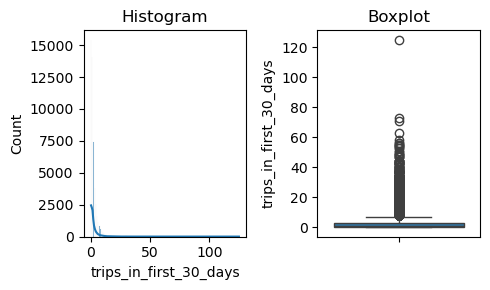

In [41]:
graphs(df['trips_in_first_30_days'])

- Histogram shows highlly right skeweed it means most of the users are taken 2 to 3 trips in first 30 days.
- Boxplot shows outliers it means some user take far more than 3 .

In [42]:
detect_outliers(df,'trips_in_first_30_days')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1
38,4.69,4.8,4.9,1.04,King's Landing,2014-06-30,iPhone,2014-01-22,5.8,24,True,61.6,0
86,3.55,4.9,4.7,1.17,King's Landing,2014-05-25,iPhone,2014-01-20,25.0,9,True,66.7,1
96,4.89,4.6,4.1,1.00,Winterfell,2014-01-07,iPhone,2014-01-26,1.9,11,True,76.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49909,1.87,4.5,4.2,1.02,Winterfell,2014-03-04,iPhone,2014-01-23,3.3,12,False,70.0,1
49948,3.30,5.0,4.9,1.01,Astapor,2014-05-19,iPhone,2014-01-25,4.3,10,False,87.0,1
49958,1.45,4.7,4.0,1.00,Astapor,2014-05-31,Android,2014-01-30,0.0,9,False,76.9,1
49964,4.80,4.6,4.5,1.04,Winterfell,2014-06-26,iPhone,2014-01-24,3.8,8,False,57.7,0


# 7.weekday_pct.

- **Insights**
-  average weekday_pct is 60.92 it means  a average of  user take its 60% trips on weekdays.
-  Histogram show slightlly left skeweed distribution but close to normal it means most of the trips are taken in weekdays.
- there is no outliers are present.

- **Preprocessing**

In [43]:
df['weekday_pct'].describe()   # average weekday_pct is 60.92 it means  a average of  user take its 60% trips on weekdays.

count    50000.000000
mean        60.926084
std         37.081503
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

In [44]:
df['weekday_pct'].skew()

-0.4777875000975233

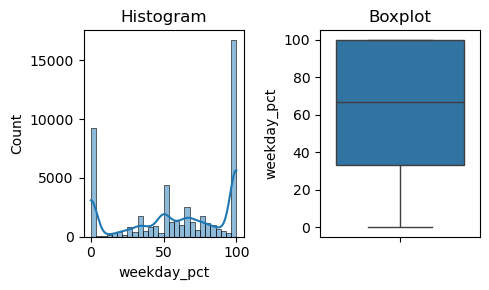

In [45]:
graphs(df['weekday_pct'])

- Histogram show slightlly left skeweed distribution but close to normal it means most of the trips are taken in weekdays.
- there is no outliers are present.

In [46]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


# city

- **Insights**
- his is a data of three cities( "King's Landing", 'Astapor', 'Winterfell')
- Piechart shows Most of the pasengers taking a trip from  Winterfell 46.67%

In [47]:
df['city'].unique() # this is a data of three cities.

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [48]:
city_count = df['city'].value_counts()   # Most of the pasengers taking a trip from  Winterfell.

city_count

city
Winterfell        23336
Astapor           16534
King's Landing    10130
Name: count, dtype: int64

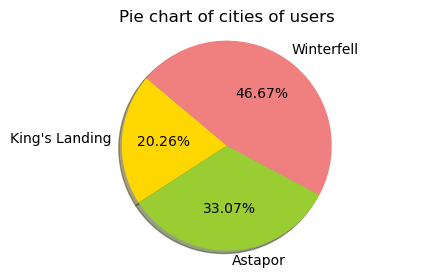

In [49]:
# Data to plot
labels = ["King's Landing", 'Astapor', 'Winterfell']
sizes = [10130,16534,23336]  # Percentages or sizes of each slice
colors = ['gold', 'yellowgreen', 'lightcoral']  # Colors for each slice


# Plotting the pie chart
plt.figure(figsize=(5,3))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.02f%%', shadow=True, startangle=140)
plt.title("Pie chart of cities of users")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

-  Piechart shows Most of the pasengers taking a trip from  Winterfell 46.67%

# Phone .

- **Insights**
- There are 2 types of phhone user iPhone', 'Android .
- pie chart shows more than 69% users are iPhone users.

In [50]:
df['phone'].unique()   # There are 2 types of phone user iPhone', 'Android however there are null value are present.

array(['iPhone', 'Android', nan], dtype=object)

In [51]:
df['phone'].isnull().sum()

396

In [52]:

df['phone'].fillna(df['phone'].mode(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\2742902749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['phone'].fillna(df['phone'].mode(),inplace=True)


In [53]:
df['phone'].isnull().sum()

396

In [54]:
phone_count = df['phone'].value_counts()
phone_count

phone
iPhone     34582
Android    15022
Name: count, dtype: int64

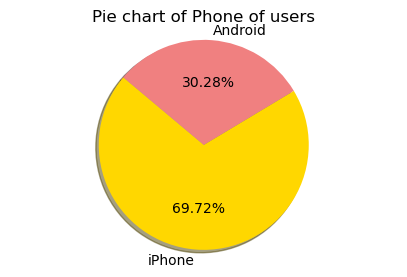

In [55]:
# Data to plot
labels = ['iPhone', 'Android']
sizes = [34582,15022]  # Percentages or sizes of each slice
colors = ['gold', 'lightcoral']  # Colors for each slice


# Plotting the pie chart
plt.figure(figsize=(5,3))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.02f%%', shadow=True, startangle=140)
plt.title("Pie chart of Phone of users")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

- pie chart shows more than 69% users are iPhone users.

# luxury_car_user.
- **Insights**
- Pie chart shows more than 37% users use luxury cars.

In [56]:
car_count = df['luxury_car_user'].value_counts()
car_count

luxury_car_user
False    31146
True     18854
Name: count, dtype: int64

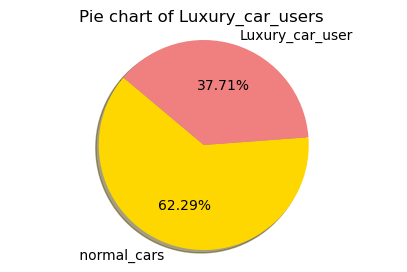

In [57]:
# Data to plot
labels = [' normal_cars ','Luxury_car_user']
sizes = [31146,18854]  # Percentages or sizes of each slice
colors = ['gold', 'lightcoral']  # Colors for each slice


# Plotting the pie chart
plt.figure(figsize=(5,3))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.02f%%', shadow=True, startangle=140)
plt.title("Pie chart of Luxury_car_users ")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

- Pie chart shows more than 37% users use luxury cars.

# churn.
- **Insights**
-  Pie chart shows more than 53 % user leave our services .

In [58]:
df['churn'].value_counts()

churn
1    26769
0    23231
Name: count, dtype: int64

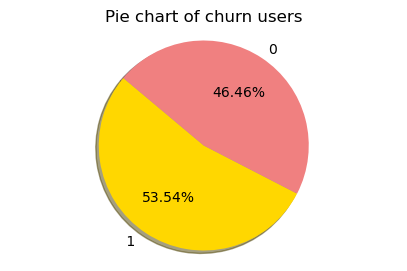

In [59]:
labels = [' 1 ','0']
sizes = [26769,23231]  # Percentages or sizes of each slice
colors = ['gold', 'lightcoral']  # Colors for each slice


# Plotting the pie chart
plt.figure(figsize=(5,3))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.02f%%', shadow=True, startangle=140)
plt.title("Pie chart of churn users")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

- Pie chart shows more than 53 % user leave our services .

# Date features.
- We need to feature engennering on this features.
  
**Date** = last_trip_date , signup_date 

# signup_date.

- **Insights**
-  first we can convert there datatype objet to datetime format for better analysis.
-  we can Extract year,month and day from a signup_date feature .

In [60]:
df.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0


In [61]:
df['signup_date'].info()   # first we can convert there datatype into datetime format.

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: signup_date
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [62]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [63]:
df['signup_date'].info()   # now this convert into datetime format.

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: signup_date
Non-Null Count  Dtype         
--------------  -----         
50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 390.8 KB


In [64]:
# we can Extract year,month and day from a signup_date feature.

df['signup_year'] = df['signup_date'].dt.year
df['signup_month'] = df['signup_date'].dt.month
df['signup_dates'] = df['signup_date'].dt.day

In [65]:
df.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,signup_year,signup_month,signup_dates
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,2014,1,25


In [66]:
df.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,signup_year,signup_month,signup_dates
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,2014,1,25


# Signup_year.

- **Insights**
- This is the data of 2014 uber users.

In [67]:
df['signup_year'].unique()   

array([2014])

In [68]:
df['signup_year'].value_counts()   # This is the data of 2014 uber users.

signup_year
2014    50000
Name: count, dtype: int64

# Signup_month.

- **Insights**
- more than 66% user signup in 1st month of the year in January 2014.

In [69]:
df['signup_month'].unique()

array([ 1,  6, 10,  9,  3, 11, 12,  2,  5,  4,  7,  8])

In [70]:
month_count = df['signup_month'].value_counts(normalize=True)*100
month_count
# more than 66% user signup in 1st month of the year in January 2014.

signup_month
1     66.482
11     4.804
10     4.042
6      3.526
7      2.972
4      2.970
9      2.866
5      2.686
12     2.668
8      2.550
3      2.426
2      2.008
Name: proportion, dtype: float64

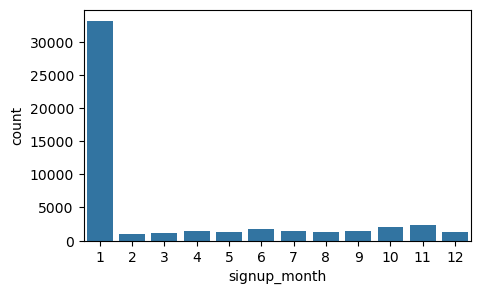

In [71]:
plt.figure(figsize=(5,3))
sns.barplot(df['signup_month'].value_counts())   # most of the user signup in january .
plt.show()

# signup_dates.

- **Insights**
-  more than 36 % users signup in 1st date of every month.

In [72]:
df['signup_dates'].unique()

array([25, 29,  1, 27, 24, 28, 21, 13, 15, 31, 19, 16, 26, 17, 22, 18, 20,
       30, 23, 14])

In [73]:
df['signup_dates'].value_counts(normalize=True)*100   # more than 36 % users signup in 1st date of every month.

signup_dates
1     36.992
18     5.896
25     5.770
24     4.568
17     4.298
31     4.200
19     4.056
26     3.416
23     3.212
30     2.942
16     2.862
22     2.738
20     2.590
28     2.568
27     2.472
21     2.468
29     2.394
14     2.240
15     2.220
13     2.098
Name: proportion, dtype: float64

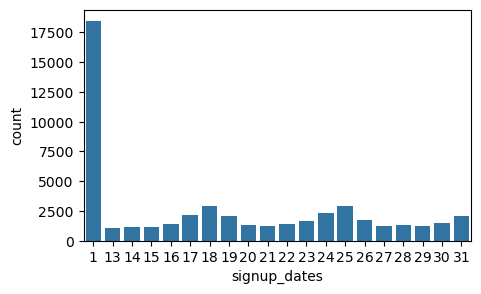

In [74]:
plt.figure(figsize=(5,3))
sns.barplot(df['signup_dates'].value_counts())   # most of the user signup in 1st date of every month .
plt.show()


# last_trip_date.

- **Insights**
- for better analysis we can convrert last_trip_date datatype into datetime format.
- we can extract month ,year , and day from d'last_trip_date' feature.

In [75]:
df['last_trip_date'].info()   

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: last_trip_date
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [76]:
# for better analysis we can convrert last_trip_date datatype into datetime format.
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['last_trip_date'].info()  

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: last_trip_date
Non-Null Count  Dtype         
--------------  -----         
50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 390.8 KB


In [77]:
# Now we can extract month ,year , and day from d'last_trip_date' feature.
df['last_trip_year'] = df['last_trip_date'].dt.year
df['last_trip_month'] = df['last_trip_date'].dt.month
df['last_trip_dates'] = df['last_trip_date'].dt.day



# last_trip_year.
- **Insights**
-  This is the data of 2014 uber users.

In [78]:
df['last_trip_year'].unique()   # This is the data of 2014 uber users.

array([2014])

# last_trip_month

- **Insights**
- more than 30% users ride there last_trip in the month of June 2014.

In [79]:
df['last_trip_month'].value_counts(normalize=True)*100   # more than 30% users ride there last_trip in the month of June 2014.

last_trip_month
6     30.930
1     18.608
5     12.406
4      7.858
3      7.774
2      6.892
12     2.936
8      2.764
11     2.682
7      2.536
9      2.484
10     2.130
Name: proportion, dtype: float64

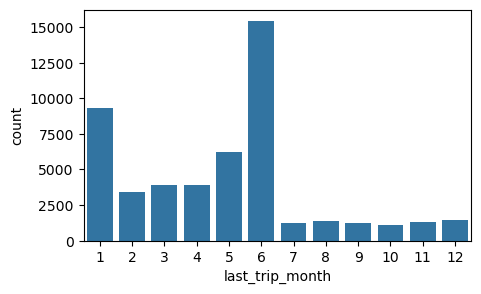

In [80]:
plt.figure(figsize=(5,3))
sns.barplot(df['last_trip_month'].value_counts())   # most of the user ride there last trip in June month of 2014. .
plt.show()


# last_trip_dates.
- **Insights**
- highest in 6th date of every month  more than 7% users ride there last trip.


In [81]:
df['last_trip_dates'].value_counts(normalize=True)*100  # highest in 6th date of every month  more than 7% users ride there last trip.

last_trip_dates
6     7.830
1     5.880
29    5.680
28    5.060
5     4.902
30    4.754
26    4.686
2     4.332
27    4.324
25    3.888
19    3.870
22    3.824
21    3.634
18    3.568
20    3.530
4     3.446
15    3.274
23    3.234
16    3.186
3     3.150
24    2.862
17    2.824
14    2.778
13    2.554
31    1.834
7     1.096
Name: proportion, dtype: float64

In [82]:
df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,signup_year,signup_month,signup_dates,last_trip_year,last_trip_month,last_trip_dates
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,2014,1,25,2014,6,17
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,2014,1,29,2014,5,5
2,0.77,5.0,4.3,1.0,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0,2014,6,1,2014,7,1


# Bivariate analysis.
- our target feature is churn.

# city & churn.

- **Insights**
- Astapor has a highest churn rate of more than 62%.

In [83]:
city_churn = pd.crosstab(df['city'],df['churn'],normalize='index')*100   # Astapor has a highest churn rate of more than 62%.
city_churn

churn,0,1
city,,
Astapor,37.419862,62.580138
King's Landing,64.136229,35.863771
Winterfell,45.196263,54.803737


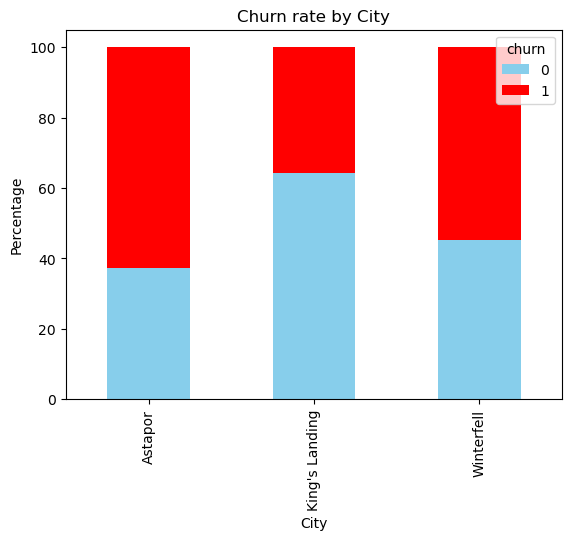

In [84]:
city_churn.plot(kind='bar',stacked=True,color = ['skyblue','red'])
plt.xlabel('City')
plt.ylabel('Percentage')
plt.title('Churn rate by City')
plt.legend(title='churn',loc='upper right')

plt.show()

- Barplot shows  Astapor has a highest churn rate of more than 62%.

# phone & churn

- **Insights**
- Android users has the highest churn rate of more than 65%.

In [85]:
phone_churn = pd.crosstab(df['phone'],df['churn'],normalize='index')*100  # Android users has the highest churn rate of more than 65%.
phone_churn

churn,0,1
phone,,
Android,34.096658,65.903342
iPhone,51.833324,48.166676


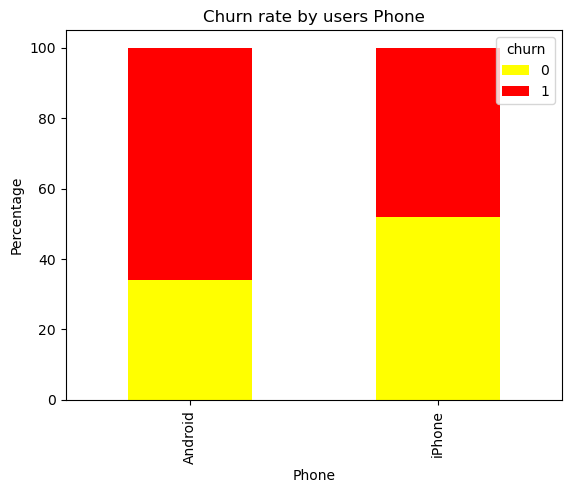

In [86]:
phone_churn.plot(kind='bar',stacked=True,color=['yellow','red'])
plt.xlabel('Phone')
plt.ylabel('Percentage')
plt.title('Churn rate by users Phone')
plt.legend(title='churn' ,loc = 'upper right')

plt.show()

- barplot shows Android users has the highest churn rate of more than 65%.


# luxury_car_user & churn.

- **Insights**
-  those users don not have a luxury cars they has a highest churn rate of more than 59%

In [87]:
luxury_car_churn = pd.crosstab(df['luxury_car_user'],df['churn'],normalize='index')*100  # those users don not have a luxury cars they has a highest churn rate of more than 59%
luxury_car_churn

churn,0,1
luxury_car_user,,
False,40.804598,59.195402
True,55.807786,44.192214


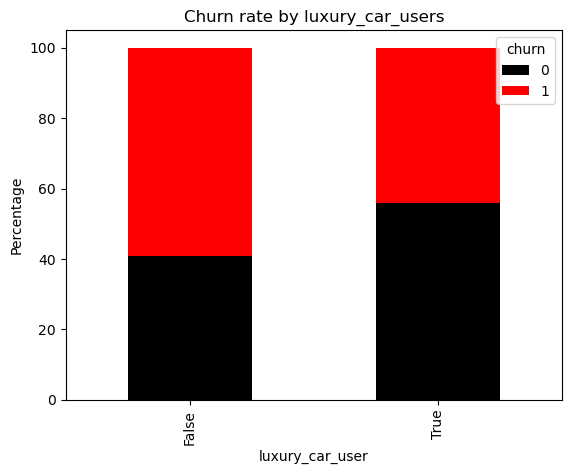

In [88]:
luxury_car_churn.plot(kind='bar',stacked=True,color=['black','red'])
plt.xlabel('luxury_car_user')
plt.ylabel('Percentage')
plt.title('Churn rate by luxury_car_users')
plt.legend(title='churn',loc= 'upper right')

plt.show()

- Barplot shows those users don not have a luxury cars they has a highest churn rate of more than 59%

# avg_dist  & churn

- **Insights**
-  Users who churn from our services tend to have higher trip distances compared to those who do not churn.
-  users who take trips with an average distance between 1 to 13 km/miles have a lower probability of churning from Uber's services. However, users with trips averaging between 13 to 20 km/miles tend to have a higher probability of churning from our services.


In [89]:
avg_dist_churn_user = df.groupby('churn')['avg_dist'].agg('median') # Users who churn from our services tend to have higher trip distances compared to those who do not churn."
avg_dist_churn_user

churn
0    3.78
1    4.01
Name: avg_dist, dtype: float64

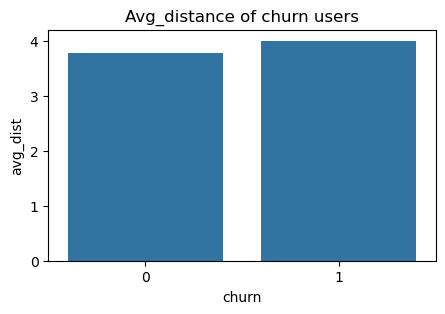

In [90]:
plt.figure(figsize=(5,3))
sns.barplot(avg_dist_churn_user)
plt.title('Avg_distance of churn users')
plt.show()

- barplot shows  Users who churn from our services tend to have higher trip distances compared to those who do not churn."

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\3860651929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['churn']==1]['avg_dist'],hist=False,label='churn')
C:\Users\HP\AppData\Local\Temp\ipykernel_5692\3860651929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

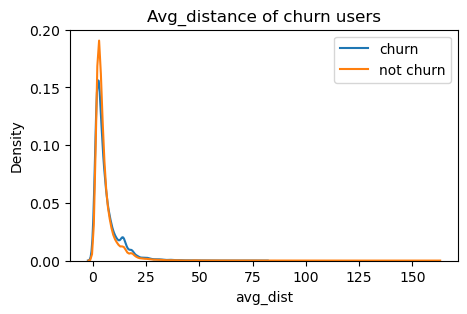

In [91]:
plt.figure(figsize=(5,3))
sns.distplot(df[df['churn']==1]['avg_dist'],hist=False,label='churn')
sns.distplot(df[df['churn']==0]['avg_dist'],hist=False,label='not churn')
plt.title('Avg_distance of churn users')
plt.legend()
plt.show()

- The above graph shows that users who take trips with an average distance between 1 to 13 km/miles have a lower probability of churning from Uber's services. However, users with trips averaging between 13 to 20 km/miles tend to have a higher probability of churning from our services.

# avg_rating_by_driver & churn.

- **Insights**
- if drivers give users a rating between 4.3 and 4.8, users have a higher probability of not churning from the service. However, if drivers give a rating between 4.8 and 5, users have the highest probability of churning from our services.

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\1603480052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['churn']==1]['avg_rating_by_driver'],hist=False,label='churn')
C:\Users\HP\AppData\Local\Temp\ipykernel_5692\1603480052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

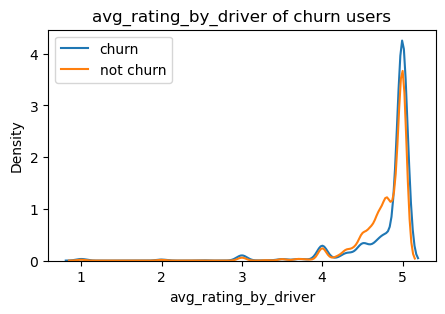

In [92]:
plt.figure(figsize=(5,3))
sns.distplot(df[df['churn']==1]['avg_rating_by_driver'],hist=False,label='churn')
sns.distplot(df[df['churn']==0]['avg_rating_by_driver'],hist=False,label='not churn')
plt.title('avg_rating_by_driver of churn users')
plt.legend()
plt.show()

- The above graph shows that if drivers give users a rating between 4.3 and 4.8, users have a higher probability of not churning from the service. However, if drivers give a rating between 4.8 and 5, users have the highest probability of churning from our services.

# avg_rating_of_driver & churn.

- **Insights**
- The above graph shows that if users give a rating to the driver between 4.2 and 4.7, the probability of not churning from the service is very high. However, if the rating by users is around 4.7 to 5, the probability of churning from our services increases."

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\3797542883.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['churn']==1]['avg_rating_of_driver'],hist=False,label='churn')
C:\Users\HP\AppData\Local\Temp\ipykernel_5692\3797542883.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

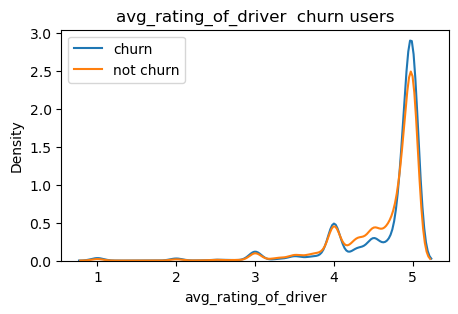

In [93]:
plt.figure(figsize=(5,3))
sns.distplot(df[df['churn']==1]['avg_rating_of_driver'],hist=False,label='churn')
sns.distplot(df[df['churn']==0]['avg_rating_of_driver'],hist=False,label='not churn')
plt.title('avg_rating_of_driver  churn users')
plt.legend()
plt.show()

- The above graph shows that if users give a rating to the driver between 4.2 and 4.7, the probability of not churning from the service is very high. However, if the rating by users is around 4.7 to 5, the probability of churning from our services increases."

# surge_pct & churn.
- **Insights**
- if users experience a surge percentage between 10% and 20%, the probability of churn is very low. However, if the surge percentage is between 1% and 10%, or around 100%, there is a higher probability that customers will churn from the service

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\2578556983.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['churn']==1]['surge_pct' ],hist=False,label='churn')
C:\Users\HP\AppData\Local\Temp\ipykernel_5692\2578556983.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

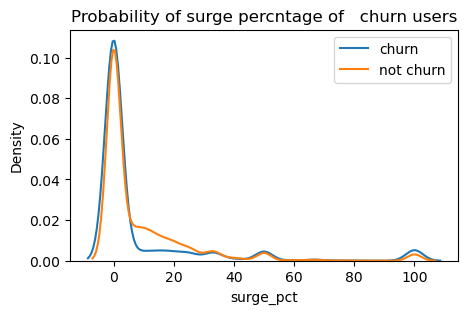

In [94]:
plt.figure(figsize=(5,3))
sns.distplot(df[df['churn']==1]['surge_pct' ],hist=False,label='churn')
sns.distplot(df[df['churn']==0]['surge_pct'],hist=False,label='not churn')
plt.title('Probability of surge percntage of   churn users')
plt.legend()
plt.show()

- if users experience a surge percentage between 10% and 20%, the probability of churn is very low. However, if the surge percentage is between 1% and 10%, or around 100%, there is a higher probability that customers will churn from the service

In [95]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,signup_year,signup_month,signup_dates,last_trip_year,last_trip_month,last_trip_dates
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,2014,1,25,2014,6,17
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,2014,1,29,2014,5,5
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,False,100.0,0,2014,6,1,2014,7,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,True,80.0,0,2014,10,1,2014,6,29
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1,2014,1,27,2014,3,15


# trips_in_first_30_days & churn.

- **Insights**
- Users who churn the service typically take fewer than 1.7 rides on average within the first 30 days.

In [96]:
trips_churn = df.groupby('churn')['trips_in_first_30_days'].mean()
trips_churn

churn
0    2.874177
1    1.760992
Name: trips_in_first_30_days, dtype: float64

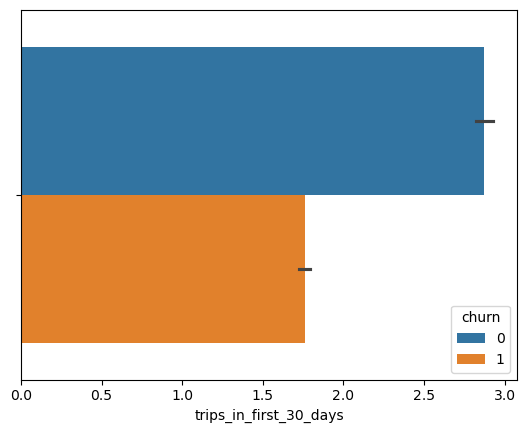

In [97]:
sns.barplot(x=df['trips_in_first_30_days'],hue=df['churn'])
plt.show()

- Users who churn the service typically take fewer than 1.7 rides on average within the first 30 days.

# weekday_pct & churn.

- **Insights**
- Users who predominantly take weekday trips, either between 1% and 18% or 90% and 100% of the time, have the highest likelihood of churning the service

In [98]:
weekday_churn = df.groupby('churn')['weekday_pct'].mean()
weekday_churn

churn
0    60.984706
1    60.875210
Name: weekday_pct, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_5692\53837071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['churn']==1]['weekday_pct' ],hist=False,label='churn')
C:\Users\HP\AppData\Local\Temp\ipykernel_5692\53837071.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[

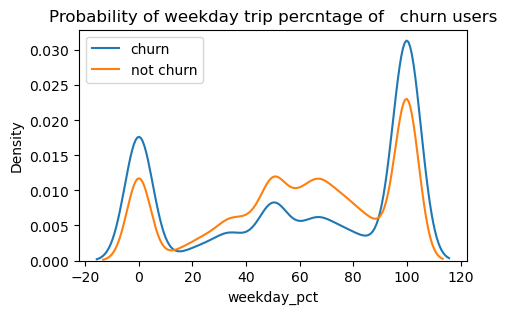

In [99]:
plt.figure(figsize=(5,3))
sns.distplot(df[df['churn']==1]['weekday_pct' ],hist=False,label='churn')
sns.distplot(df[df['churn']==0]['weekday_pct' ],hist=False,label='not churn')
plt.title('Probability of weekday trip percntage of   churn users')
plt.legend()
plt.show()

- Users who predominantly take weekday trips, either between 1% and 18% or 90% and 100% of the time, have the highest likelihood of churning the service

In [100]:
df.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,signup_year,signup_month,signup_dates,last_trip_year,last_trip_month,last_trip_dates
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,2014,1,25,2014,6,17


# signup_month & churn.

- **Insights**
- Higher churn in the early months: Users who signed up in the first few months (1-3) have a relatively higher churn rate, starting at around 0.55-0.60. This suggests that users who signed up early in the year are more likely to leave.

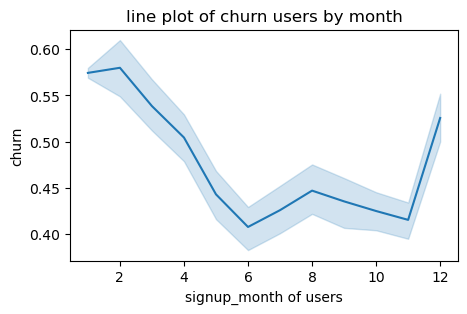

In [101]:
plt.figure(figsize=(5,3))
sns.lineplot(x=df['signup_month'],y=df['churn'])
plt.xlabel('signup_month of users')
plt.ylabel('churn')
plt.title('line plot of churn users by month')
plt.show()

### Key Findings:
- **Higher churn in early months (1-3)**: Churn rate starts high (0.55-0.60), indicating users who sign up early in the year are more likely to leave.
- **Churn declines from month 3-6**: A noticeable drop, with churn as low as 0.40-0.42, suggesting higher user satisfaction.
- **Churn rises after month 6**: Increases steadily through months 7-12, but not as high as the early months.

### Actionable Insights:
- **Target early signups**: Focus retention efforts on users signing up in the first few months to reduce churn.
- **Analyze mid-year success**: Study why users signing up around month 6 have lower churn to replicate that across other months.

# signup_dates & churn.

- **Insights**
- Churn increases mid-month: The churn rate rises steadily until around the 15th-20th day of the month, peaking at around 0.60-0.65.

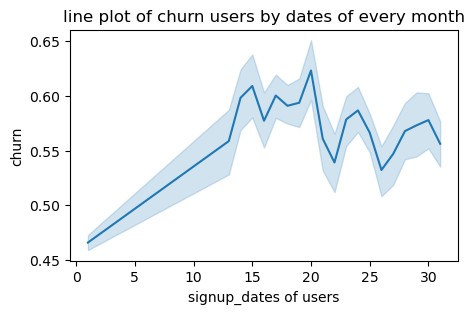

In [102]:
plt.figure(figsize=(5,3))
sns.lineplot(x=df['signup_dates'],y=df['churn'])
plt.xlabel('signup_dates of users')
plt.ylabel('churn')
plt.title('line plot of churn users by dates of every month')
plt.show()



### Key Findings:
1. **Churn increases mid-month**: The churn rate rises steadily until around the 15th-20th day of the month, peaking at around 0.60-0.65.
   
2. **Fluctuations after mid-month**: After the peak, the churn rate shows significant fluctuations, with dips around the 20th and 25th days, followed by another rise towards the end of the month.

3. **Higher churn after mid-month**: Users who sign up after the 15th day generally exhibit more variability and higher churn compared to early-month signups.



### Actionable Insights:
- **Focus retention on mid-month signups**: Implement targeted engagement strategies for users signing up between the 15th and 20th, as they have the highest churn.
- **Address fluctuations after mid-month**: Monitor users signing up after the 20th closely and offer incentives or personalized communication to reduce variability in churn.
- **Optimize early-month user experience**: Enhance onboarding and engagement for early-month signups to prevent churn from increasing later in the month.

# last_trip_month & churn.

- **Insights**
- High churn early in the year: The churn rate remains at 100% for users whose last trip was in the first five months.
Sharp decline after month 5: Churn drops to nearly 0% from month 6 onwards, indicating that users who had their last trip in mid-year are highly unlikely to churn.

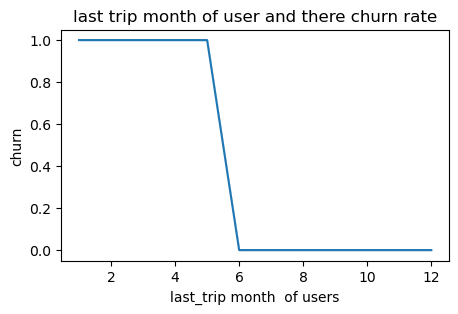

In [103]:
plt.figure(figsize=(5,3))
sns.lineplot(x=df['last_trip_month'],y=df['churn'])
plt.xlabel('last_trip month  of users')
plt.ylabel('churn')
plt.title('last trip month of user and there churn rate')
plt.show()

### Key Findings:
- **High churn early in the year**: The churn rate remains at 100% for users whose last trip was in the first five months.
- **Sharp decline after month 5**: Churn drops to nearly 0% from month 6 onwards, indicating that users who had their last trip in mid-year are highly unlikely to churn.

### Actionable Insights:
- **Focus on users leaving early**: Implement retention strategies for users whose last trip occurs within the first five months, as they are highly likely to churn.
- **Leverage mid-year engagement**: Study why users with a last trip in month 6 and beyond have a near-zero churn rate and replicate that success for early-year users.

# last_trip_dates & churn.

- **insights**
-  Users who take their last trip between the 7th and 12th of the month have the highest churn rate


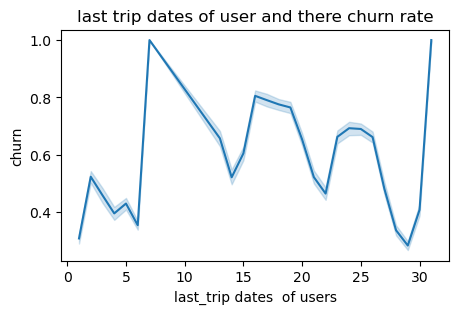

In [104]:
plt.figure(figsize=(5,3))
sns.lineplot(x=df['last_trip_dates'],y=df['churn'])
plt.xlabel('last_trip dates  of users')
plt.ylabel('churn')
plt.title('last trip dates of user and there churn rate')
plt.show()

- Users who take their last trip between the 7th and 12th of the month have the highest churn rate.

# Encoding categorical features.
- we can encode the categorical features for better performace of mmodel.
- **Nominal Encoding** - city , phone
- **Ordinal Encoding** - luxury_car_user 

# luxury_car_user

In [105]:
df['luxury_car_user'].unique()

array([ True, False])

In [106]:
df['luxury_car_user'].dtype

dtype('bool')

In [107]:
df['luxury_car_user'] = df['luxury_car_user'].map({True: 1, False: 0})


In [108]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,signup_year,signup_month,signup_dates,last_trip_year,last_trip_month,last_trip_dates
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,2014,1,25,2014,6,17
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,1,2014,1,29,2014,5,5
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,0,100.0,0,2014,6,1,2014,7,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,1,80.0,0,2014,10,1,2014,6,29
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,1,2014,1,27,2014,3,15


In [109]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [110]:
# Apply one-hot encoding
encoded_data = pd.get_dummies(df['city'])

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_data], axis=1)

In [111]:

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,churn,signup_year,signup_month,signup_dates,last_trip_year,last_trip_month,last_trip_dates,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,2014,1,25,2014,6,17,False,True,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,1,2014,1,29,2014,5,5,True,False,False
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,...,0,2014,6,1,2014,7,1,True,False,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,...,0,2014,10,1,2014,6,29,False,True,False
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,1,2014,1,27,2014,3,15,False,False,True


In [112]:
df['Astapor'] = df['Astapor'].astype(int)
df["King's Landing"] = df["King's Landing"].astype(int)
df['Winterfell'] = df['Winterfell'].astype(int)

In [113]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,churn,signup_year,signup_month,signup_dates,last_trip_year,last_trip_month,last_trip_dates,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,2014,1,25,2014,6,17,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,1,2014,1,29,2014,5,5,1,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,...,0,2014,6,1,2014,7,1,1,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,...,0,2014,10,1,2014,6,29,0,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,1,2014,1,27,2014,3,15,0,0,1


In [114]:
# Apply one-hot encoding
encoded_data = pd.get_dummies(df['phone'])

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_data], axis=1)

In [115]:
df['iPhone'] = df['iPhone'].astype(int)
df["Android"] = df["Android"].astype(int)

# Feature Transformation.
- we can transform these features for better model peroformace to prediction of churn users.
- avg_dist , avg_rating_by_driver , avg_rating_of_driver , avg_surge , surge_pct, trips_in_first_30_days

# check skweness after transformation .
from scipy import stats


def transform_and_test_skew(df, feature):
    transformations = {}
    
    # Log Transformation (adding 1 to avoid log(0) error)
    df[f'{feature}_log'] = np.log1p(df[feature])
    transformations['log_skew'] = df[f'{feature}_log'].skew()

    # Square Root Transformation
    df[f'{feature}_sqrt'] = np.sqrt(df[feature])
    transformations['sqrt_skew'] = df[f'{feature}_sqrt'].skew()

    # Reciprocal Transformation (avoiding division by zero)
    df[f'{feature}_reciprocal'] = 1 / (df[feature] + 1e-6)
    transformations['reciprocal_skew'] = df[f'{feature}_reciprocal'].skew()

    # Box-Cox Transformation (requires all positive values)
    if (df[feature] > 0).all():
        df[f'{feature}_boxcox'], _ = stats.boxcox(df[feature])
        transformations['boxcox_skew'] = df[f'{feature}_boxcox'].skew()
    else:
        transformations['boxcox_skew'] = 'Box-Cox requires positive values'

    # Exponential Transformation
    df[f'{feature}_exp'] = np.exp(df[feature])
    transformations['exp_skew'] = df[f'{feature}_exp'].skew()

    # Cube Root Transformation
    df[f'{feature}_cbrt'] = np.cbrt(df[feature])
    transformations['cbrt_skew'] = df[f'{feature}_cbrt'].skew()

    # Return skewness results
    return transformations



skewness_results = transform_and_test_skew(df, 'trips_in_first_30_days')
print(skewness_results)


In [116]:
from scipy import stats

# avg_dist.

In [117]:
df['avg_dist'].skew()   # we can use log skweness.

3.4641702935544214

In [118]:
# Log Transformation (adding 1 to avoid log(0) error)
df['avg_dist_log'] = np.log1p(df['avg_dist'])
print('log_sweness_avg_dist',df['avg_dist_log'].skew())

log_sweness_avg_dist 0.5490084861571455


# avg_rating_by_driver

In [119]:
df['avg_rating_by_driver'].skew()  # we can use 'boxcox_skew'

-4.136590561683364

In [120]:
# Box-Cox Transformation (requires all positive values)
df['avg_rating_by_driver_box_cox'], _ = stats.boxcox(df['avg_rating_by_driver'])
print('avg_rating_by_driver_box_cox',df['avg_rating_by_driver_box_cox'].skew())

avg_rating_by_driver_box_cox -0.8838101401361335


# avg_rating_of_driver

In [121]:
df['avg_rating_of_driver'].skew()  #  we can use 'boxcox_skew'.

-2.7399264873481326

In [122]:
df['avg_rating_of_driver_box_cox'], _ = stats.boxcox(df['avg_rating_of_driver'])
print('avg_rating_of_driver_box_cox',df['avg_rating_of_driver_box_cox'].skew())

avg_rating_of_driver_box_cox -0.8041187816424842


# avg_surge

In [123]:
df['avg_surge'].skew()    #  we can use 'boxcox_skew'.

6.82134619068908

In [124]:
df['avg_surge_box_cox'], _ = stats.boxcox(df['avg_surge'])
print('avg_surge_box_cox',df['avg_surge_box_cox'].skew())

avg_surge_box_cox 1.1895552417151225


# surge_pct.

In [125]:
df['surge_pct'].skew()  # reciprocal_skew':

3.144123929858724

In [126]:
# Reciprocal Transformation (avoiding division by zero)
df['surge_pct_reciprocal'] = 1 / (df['surge_pct'] + 1e-6)
print(df['surge_pct_reciprocal'].skew())

-0.8124815017645751


# trips_in_first_30_days

In [127]:
df['trips_in_first_30_days'].skew()   # 'cbrt_skew'

5.167754878702526

In [128]:
# Cube Root Transformation
df['trips_in_first_30_days_cbrt'] = np.cbrt(df['trips_in_first_30_days'])
print(df['trips_in_first_30_days_cbrt'].skew())

0.0784916759950986


In [129]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,King's Landing,Winterfell,Android,iPhone,avg_dist_log,avg_rating_by_driver_box_cox,avg_rating_of_driver_box_cox,avg_surge_box_cox,surge_pct_reciprocal,trips_in_first_30_days_cbrt
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1,0,0,1,1.541159,8.285696e+07,67393.856045,0.054634,0.064935,1.587401
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,0,1,0,2.225704,8.285696e+07,114548.505398,0.000000,1000000.000000,0.000000
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,...,0,0,0,1,0.570980,8.285696e+07,31438.248898,0.000000,1000000.000000,1.442250
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,...,1,0,0,1,1.211941,6.382406e+07,56046.723489,0.062908,0.050000,2.080084
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,1,1,0,1.418277,6.382406e+07,38286.978623,0.068895,0.084746,2.410142


# We need to feature engeenering on some features.

In [130]:


# we can new feature called no.of days b/w signup_date & last_trip_date.
df['no_of_days_b/w_signup_&_last_trip'] = (df['last_trip_date'] - df['signup_date']).dt.days

In [131]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,Winterfell,Android,iPhone,avg_dist_log,avg_rating_by_driver_box_cox,avg_rating_of_driver_box_cox,avg_surge_box_cox,surge_pct_reciprocal,trips_in_first_30_days_cbrt,no_of_days_b/w_signup_&_last_trip
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,0,0,1,1.541159,8.285696e+07,67393.856045,0.054634,0.064935,1.587401,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,0,1,0,2.225704,8.285696e+07,114548.505398,0.000000,1000000.000000,0.000000,96
2,0.77,5.0,4.3,1.00,Astapor,2014-07-01,iPhone,2014-06-01,0.0,3,...,0,0,1,0.570980,8.285696e+07,31438.248898,0.000000,1000000.000000,1.442250,30
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-10-01,20.0,9,...,0,0,1,1.211941,6.382406e+07,56046.723489,0.062908,0.050000,2.080084,-94
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,1,1,0,1.418277,6.382406e+07,38286.978623,0.068895,0.084746,2.410142,47


In [132]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'churn',
       'signup_year', 'signup_month', 'signup_dates', 'last_trip_year',
       'last_trip_month', 'last_trip_dates', 'Astapor', 'King's Landing',
       'Winterfell', 'Android', 'iPhone', 'avg_dist_log',
       'avg_rating_by_driver_box_cox', 'avg_rating_of_driver_box_cox',
       'avg_surge_box_cox', 'surge_pct_reciprocal',
       'trips_in_first_30_days_cbrt', 'no_of_days_b/w_signup_&_last_trip'],
      dtype='object')

In [133]:
df.drop(columns=['last_trip_date','phone','signup_date','signup_year', 'signup_month', 'signup_dates','last_trip_year','last_trip_month', 'last_trip_dates'],inplace=True)

In [134]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,...,Winterfell,Android,iPhone,avg_dist_log,avg_rating_by_driver_box_cox,avg_rating_of_driver_box_cox,avg_surge_box_cox,surge_pct_reciprocal,trips_in_first_30_days_cbrt,no_of_days_b/w_signup_&_last_trip
0,3.67,5.0,4.7,1.10,King's Landing,15.4,4,1,46.2,0,...,0,0,1,1.541159,8.285696e+07,67393.856045,0.054634,0.064935,1.587401,143
1,8.26,5.0,5.0,1.00,Astapor,0.0,0,0,50.0,1,...,0,1,0,2.225704,8.285696e+07,114548.505398,0.000000,1000000.000000,0.000000,96
2,0.77,5.0,4.3,1.00,Astapor,0.0,3,0,100.0,0,...,0,0,1,0.570980,8.285696e+07,31438.248898,0.000000,1000000.000000,1.442250,30
3,2.36,4.9,4.6,1.14,King's Landing,20.0,9,1,80.0,0,...,0,0,1,1.211941,6.382406e+07,56046.723489,0.062908,0.050000,2.080084,-94
4,3.13,4.9,4.4,1.19,Winterfell,11.8,14,0,82.4,1,...,1,1,0,1.418277,6.382406e+07,38286.978623,0.068895,0.084746,2.410142,47


In [135]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'surge_pct', 'trips_in_first_30_days', 'luxury_car_user',
       'weekday_pct', 'churn', 'Astapor', 'King's Landing', 'Winterfell',
       'Android', 'iPhone', 'avg_dist_log', 'avg_rating_by_driver_box_cox',
       'avg_rating_of_driver_box_cox', 'avg_surge_box_cox',
       'surge_pct_reciprocal', 'trips_in_first_30_days_cbrt',
       'no_of_days_b/w_signup_&_last_trip'],
      dtype='object')

In [136]:
df.drop(columns=['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','surge_pct', 'trips_in_first_30_days'],inplace=True)

In [137]:
df.head()

,city,luxury_car_user,weekday_pct,churn,Astapor,King's Landing,Winterfell,Android,iPhone,avg_dist_log,avg_rating_by_driver_box_cox,avg_rating_of_driver_box_cox,avg_surge_box_cox,surge_pct_reciprocal,trips_in_first_30_days_cbrt,no_of_days_b/w_signup_&_last_trip
0,King's Landing,1,46.2,0,0,1,0,0,1,1.541159,8.285696e+07,67393.856045,0.054634,0.064935,1.587401,143
1,Astapor,0,50.0,1,1,0,0,1,0,2.225704,8.285696e+07,114548.505398,0.000000,1000000.000000,0.000000,96
2,Astapor,0,100.0,0,1,0,0,0,1,0.570980,8.285696e+07,31438.248898,0.000000,1000000.000000,1.442250,30
3,King's Landing,1,80.0,0,0,1,0,0,1,1.211941,6.382406e+07,56046.723489,0.062908,0.050000,2.080084,-94
4,Winterfell,0,82.4,1,0,0,1,1,0,1.418277,6.382406e+07,38286.978623,0.068895,0.084746,2.410142,47


In [138]:
df.drop('city',axis=1,inplace=True)

In [139]:
df.head(3)

,luxury_car_user,weekday_pct,churn,Astapor,King's Landing,Winterfell,Android,iPhone,avg_dist_log,avg_rating_by_driver_box_cox,avg_rating_of_driver_box_cox,avg_surge_box_cox,surge_pct_reciprocal,trips_in_first_30_days_cbrt,no_of_days_b/w_signup_&_last_trip
0,1,46.2,0,0,1,0,0,1,1.541159,8.285696e+07,67393.856045,0.054634,0.064935,1.587401,143
1,0,50.0,1,1,0,0,1,0,2.225704,8.285696e+07,114548.505398,0.000000,1000000.000000,0.000000,96
2,0,100.0,0,1,0,0,0,1,0.570980,8.285696e+07,31438.248898,0.000000,1000000.000000,1.442250,30


In [140]:
df.to_csv('cleaned_df.csv', index=False)

In [141]:
df1 = pd.read_csv('cleaned_df.csv')
df1.head()

,luxury_car_user,weekday_pct,churn,Astapor,King's Landing,Winterfell,Android,iPhone,avg_dist_log,avg_rating_by_driver_box_cox,avg_rating_of_driver_box_cox,avg_surge_box_cox,surge_pct_reciprocal,trips_in_first_30_days_cbrt,no_of_days_b/w_signup_&_last_trip
0,1,46.2,0,0,1,0,0,1,1.541159,8.285696e+07,67393.856045,0.054634,0.064935,1.587401,143
1,0,50.0,1,1,0,0,1,0,2.225704,8.285696e+07,114548.505398,0.000000,1000000.000000,0.000000,96
2,0,100.0,0,1,0,0,0,1,0.570980,8.285696e+07,31438.248898,0.000000,1000000.000000,1.442250,30
3,1,80.0,0,0,1,0,0,1,1.211941,6.382406e+07,56046.723489,0.062908,0.050000,2.080084,-94
4,0,82.4,1,0,0,1,1,0,1.418277,6.382406e+07,38286.978623,0.068895,0.084746,2.410142,47


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   luxury_car_user                    50000 non-null  int64  
 1   weekday_pct                        50000 non-null  float64
 2   churn                              50000 non-null  int64  
 3   Astapor                            50000 non-null  int64  
 4   King's Landing                     50000 non-null  int64  
 5   Winterfell                         50000 non-null  int64  
 6   Android                            50000 non-null  int64  
 7   iPhone                             50000 non-null  int64  
 8   avg_dist_log                       50000 non-null  float64
 9   avg_rating_by_driver_box_cox       50000 non-null  float64
 10  avg_rating_of_driver_box_cox       50000 non-null  float64
 11  avg_surge_box_cox                  50000 non-null  flo

1.	ML Models: Logistic Regression, Decision Trees, Random Forest, Gradient Boosting Machines (Ensemble Learning).

# Model 1. Logistic regression.

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix , classification_report

In [144]:
# Extraxt independent and dependent variable.
X = df1.drop('churn',axis=1)
y = df1['churn']

In [145]:
# Now split dataset into 80 - 20 ration in train testsplit.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [147]:
log_reg = LogisticRegression()


In [148]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [149]:
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [150]:
# Evaluate the model's performance.
accuracy = accuracy_score(y_test,y_pred)
conf_matrix =confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

In [151]:
print("accuracy_score",accuracy)
print('confusion_matrix',conf_matrix)


accuracy_score 0.7642
confusion_matrix [[3399 1321]
 [1037 4243]]


-- our logistic regression model's performance summary:

- **Accuracy**: 76.42% – The model correctly predicted 76.42% of all cases.
- **Confusion Matrix**:
  - **True Negatives (TN)**: 3399 – Correctly predicted non-churn cases.
  - **False Positives (FP)**: 1321 – Non-churn cases wrongly predicted as churn.
  - **False Negatives (FN)**: 1037 – Churn cases wrongly predicted as non-churn.
  - **True Positives (TP)**: 4243 – Correctly predicted churn cases.

### Key Metrics:
- **Precision** (Class 1): 76.29% – 76.29% of predicted churn cases were correct.
- **Recall** (Class 1): 80.35% – The model caught 80.35% of all actual churn cases.

In [152]:
print('classification_report',class_report)

classification_report               precision    recall  f1-score   support

           0       0.77      0.72      0.74      4720
           1       0.76      0.80      0.78      5280

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



- our classification report for the **Uber churn rate** model provides insights into the performance for both classes (churn and non-churn):

### Class 0 (Non-Churn):
- **Precision (0.77)**: Out of all the instances predicted as class 0, 77% were correct.
- **Recall (0.72)**: Out of all actual class 0 instances, the model correctly identified 72%.
- **F1-Score (0.74)**: The harmonic mean of precision and recall, balancing both.

### Class 1 (Churn):
- **Precision (0.76)**: Out of all the instances predicted as churn (class 1), 76% were correct.
- **Recall (0.80)**: Out of all actual churn instances, the model correctly identified 80%.
- **F1-Score (0.78)**: Shows the balance between precision and recall for churn cases.

### Overall Metrics:
- **Accuracy (0.76)**: The model correctly predicted 76% of all instances.
- **Macro Avg** (0.76 for precision, recall, and F1): Simple average of the metrics across both classes, treating each class equally.
- **Weighted Avg** (0.76 for precision, recall, and F1): Takes into account the number of instances in each class, giving more weight to the class with more samples.

### Key Points:
- The model performs similarly for both classes, with slightly better recall for class 1 (churn), meaning it’s more effective at identifying churners.
- A balanced F1-score for both classes (0.74 and 0.78) indicates a good trade-off between precision and recall. However, there’s still room to improve the recall for non-churn (class 0).

# Model 2.DecisionTree

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report



# Separate features (X) and target variable (y)
X = df1.drop('churn', axis=1)  # Replace 'target_column' with your actual target column name
y = df1['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a Decision Tree classifier
model = DecisionTreeClassifier(criterion = 'gini',random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix =confusion_matrix(y_test,y_pred)
print("Accuracy:", accuracy)
print('confusion_matrix',conf_matrix)


# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.8073
confusion_matrix [[3777  943]
 [ 984 4296]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      4720
           1       0.82      0.81      0.82      5280

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



our Decision Tree regression model's performance for Uber churn rate:

### Accuracy:
- **80.73%**: The model correctly predicted 80.73% of all cases.

### Confusion Matrix:
- **True Negatives (TN)**: 3777 – Correctly predicted non-churn cases.
- **False Positives (FP)**: 943 – Non-churn cases wrongly predicted as churn.
- **False Negatives (FN)**: 984 – Churn cases wrongly predicted as non-churn.
- **True Positives (TP)**: 4296 – Correctly predicted churn cases.

### Key Metrics:
- **Class 0 (Non-Churn)**: 
  - **Precision**: 79% – 79% of predicted non-churn cases were correct.
  - **Recall**: 80% – The model correctly identified 80% of actual non-churn cases.
- **Class 1 (Churn)**: 
  - **Precision**: 82% – 82% of predicted churn cases were correct.
  - **Recall**: 81% – The model correctly identified 81% of actual churn cases.
  
Overall, the model performs well, with balanced precision and recall for both churn and non-churn cases.

# Model 3 . RandomForest

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Separate features (X) and target variable (y)
X = df1.drop('churn', axis=1)  # Replace 'target_column' with your actual target column name
y = df1['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500,criterion='gini', random_state=42,)  # Adjust n_estimators as needed

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix =confusion_matrix(y_test,y_pred)
print("Accuracy:", accuracy)
print('confusion_matrix',conf_matrix)


# Print classification report for detailed evaluation.
print(classification_report(y_test, y_pred))

Accuracy: 0.8461
confusion_matrix [[3619 1101]
 [ 438 4842]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      4720
           1       0.81      0.92      0.86      5280

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.84     10000



- our RandomForest regression model's performance for Uber churn rate:

### Accuracy:
- **84.4%**: The model correctly predicted 84.4% of all cases.

### Confusion Matrix:
- **True Negatives (TN)**: 3619 – Correctly predicted non-churn cases.
- **False Positives (FP)**: 1101 – Non-churn cases wrongly predicted as churn.
- **False Negatives (FN)**: 438 – Churn cases wrongly predicted as non-churn.
- **True Positives (TP)**: 4842 – Correctly predicted churn cases.

### Key Metrics:
- **Class 0 (Non-Churn)**: 
  - **Precision**: 89% – 89% of predicted non-churn cases were correct.
  - **Recall**: 77% – The model correctly identified 77% of actual non-churn cases.
- **Class 1 (Churn)**: 
  - **Precision**: 81% – 81% of predicted churn cases were correct.
  - **Recall**: 91% – The model correctly identified 91% of actual churn cases.

### Summary:
- The model is better at identifying churn cases (high recall for class 1) but misses some non-churn cases (lower recall for class 0). It overall performs well with a balanced precision and recall.

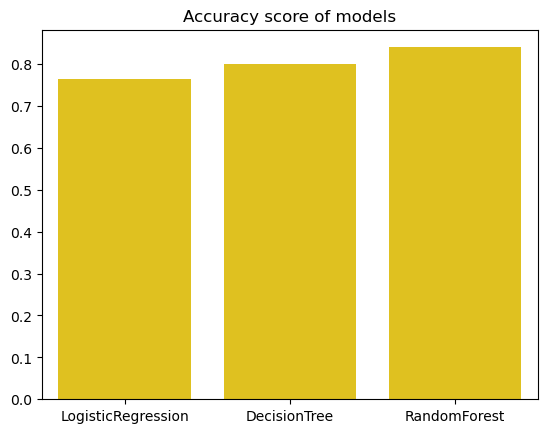

In [155]:
models = ['LogisticRegression','DecisionTree','RandomForest']
performance = [0.7642,0.80,0.84]

sns.barplot(x=models,y=performance,color='gold')
plt.title('Accuracy score of models')


plt.show()

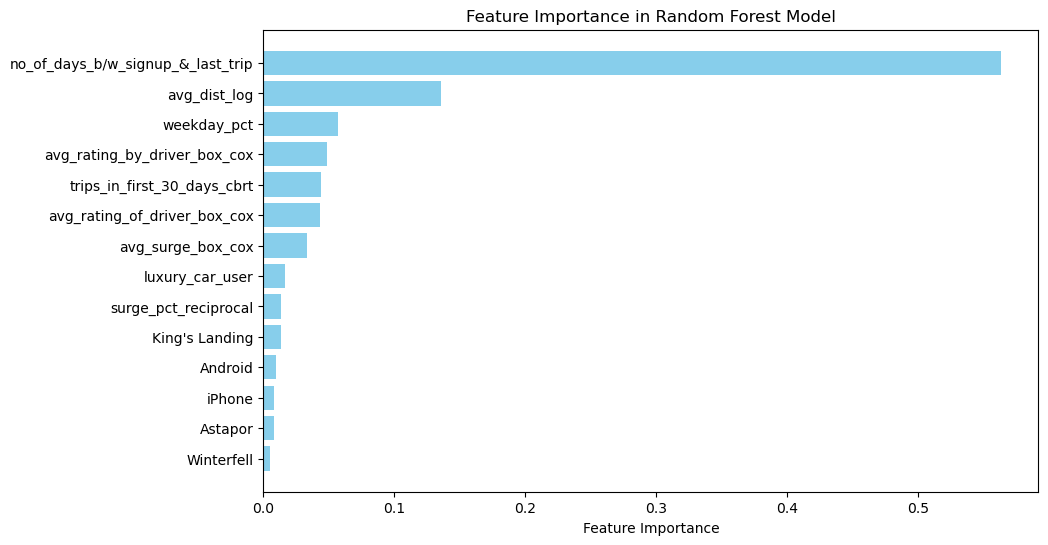

In [156]:
# Get feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()